<a href="https://colab.research.google.com/github/reza-latifi/Sounds-Cosine-Similarity/blob/main/SoundSimilarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import soundfile as SF
from matplotlib import pyplot as plt
import numpy as np

# Find Cosine similarity between two functions

In [ ]:
def sim(a,b):
  return np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b))

In [ ]:
f1 = [1.7*((x/1000)**2) for x in range(1000)] # 0 to 1
g1 = [np.exp(x/1000)-1 for x in range(1000)] # 0 to 1

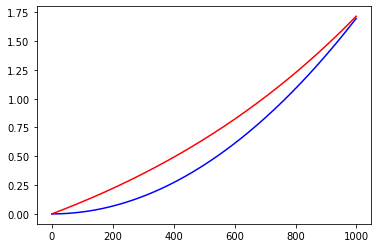

 Similarity of f(t) and g(t) in range 0 to 1 is 0.9886891086589539


In [ ]:
plt.plot(f1, label='f(t)', color='b')
plt.plot(g1, label='g(t)', color='r')
plt.show()
print(f" Similarity of f(t) and g(t) in range 0 to 1 is {sim(f1, g1)}")

In [ ]:
f2 = [1.7*((x/100)**2) for x in range(1000)] # 0 to 10
g2 = [np.exp(x/100)-1 for x in range(1000)] # 0 to 10

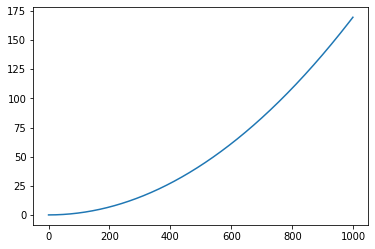

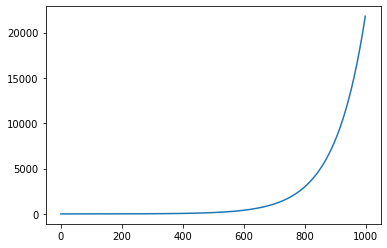

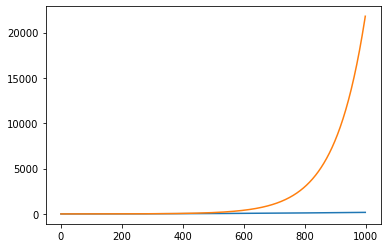

 Similarity of f(t) and g(t) in range 0 to 10 is 0.8200490463011035


In [ ]:
plt.plot(f2)
plt.show()
#--------------
plt.plot(g2)
plt.show()
#------------
plt.plot(f2)
plt.plot(g2)
plt.show()
print(f" Similarity of f(t) and g(t) in range 0 to 10 is {sim(f2, g2)}")

The similarity of the functions is still close to 1. Because magnitude of the numbers does not affect Cosine similarity

# Lets find a value for "a" that maximizes the Cosine similarity

In [3]:
def f():
  return [1/np.square(1+((x/200)**2)) for x in range(1000)] # in range 0 to 5
def g(a):
  return [np.exp(-1 * a * ((x/200)**2)) for x in range(1000)] # in range 0 to 5

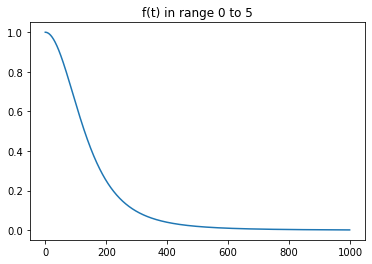

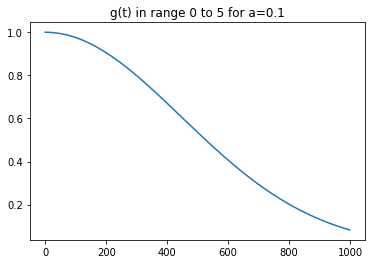

In [4]:
plt.title('f(t) in range 0 to 5')
plt.plot(f())
plt.show()
plt.title('g(t) in range 0 to 5 for a=0.1')
plt.plot(g(0.1))
plt.show()

In [ ]:
# Finding best "a"
lastA = 0.8
a = 0.9
similarity = sim(f(), g(a))
lastSimilarity = sim(f(), g(lastA))
while similarity < 0.99:
  sign = np.sign(a - lastA) * np.sign(similarity - lastSimilarity) # Gradient of "a" * Gradient of similarity
  lastA = a
  a += sign * 0.0001
  lastSimilarity = similarity
  similarity = sim(f(), g(a))
  print(f"a is {a} and similarity is {similarity}")

a is 0.9001 and similarity is 0.9887505183782719
a is 0.9002 and similarity is 0.9887549199015887
a is 0.9003 and similarity is 0.9887593197640574
a is 0.9004 and similarity is 0.9887637179661405
a is 0.9005 and similarity is 0.9887681145083022
a is 0.9006 and similarity is 0.9887725093910052
a is 0.9007 and similarity is 0.9887769026147132
a is 0.9007999999999999 and similarity is 0.9887812941798884
a is 0.9008999999999999 and similarity is 0.9887856840869934
a is 0.9009999999999999 and similarity is 0.9887900723364915
a is 0.9010999999999999 and similarity is 0.9887944589288445
a is 0.9011999999999999 and similarity is 0.9887988438645151
a is 0.9012999999999999 and similarity is 0.9888032271439646
a is 0.9013999999999999 and similarity is 0.9888076087676556
a is 0.9014999999999999 and similarity is 0.9888119887360495
a is 0.9015999999999998 and similarity is 0.988816367049608
a is 0.9016999999999998 and similarity is 0.9888207437087925
a is 0.9017999999999998 and similarity is 0.9888

# Find Cosine similarity between sounds

In [ ]:
# Read Files
violin, violinFs = SF.read('violin.wav')
viola, violaFs = SF.read('viola.wav')
piano, pianoFs = SF.read('piano.wav')
horn, hornFs = SF.read('horn.wav')

# Select First channel
violin = violin[:,0]
viola = viola[:,0]
piano = piano[:,0]
horn = horn[:,0]

In [ ]:
waves = {'violin': violin, 'viola': viola, 'piano': piano, 'horn': horn}
freqs = {'violin': violinFs, 'viola': violaFs, 'piano': pianoFs, 'horn': hornFs}

In [ ]:
for wave in waves:
  print(f"Length of {wave} is {len(waves[wave])}")
  print(f"Frequency of {wave} is {freqs[wave]}")
  print(f"Period of {wave} is {1/freqs[wave]} seconds\n")

Length of violin is 62600
Frequency of violin is 44100
Period of violin is 2.2675736961451248e-05 seconds

Length of viola is 62600
Frequency of viola is 44100
Period of viola is 2.2675736961451248e-05 seconds

Length of piano is 62600
Frequency of piano is 44100
Period of piano is 2.2675736961451248e-05 seconds

Length of horn is 62600
Frequency of horn is 44100
Period of horn is 2.2675736961451248e-05 seconds



 Similarity of violin and violin is 1.0


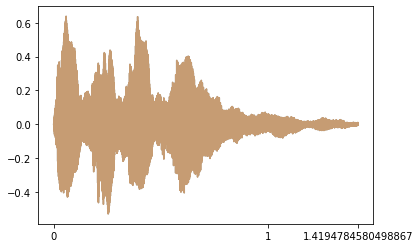

 Similarity of violin and viola is 0.6416492383286069


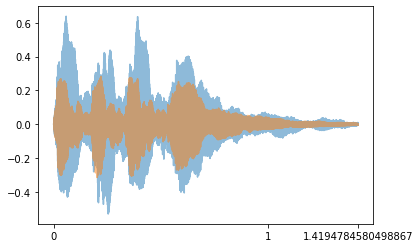

 Similarity of violin and piano is -0.34839359652880514


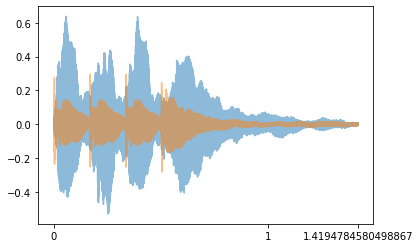

 Similarity of violin and horn is -0.09231030264611177


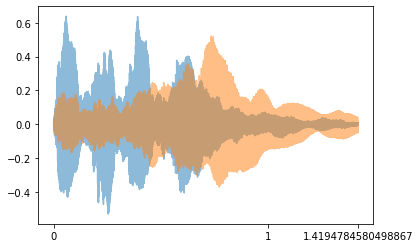

In [ ]:
for wave in waves:
  print(f" Similarity of violin and {wave} is {sim(waves['violin'], waves[wave])}")
  plt.xticks([0, freqs['violin'], len(waves['violin'])-1], [0, 1, (len(waves['violin'])-1)/freqs['violin']])
  plt.plot(waves['violin'], alpha= 0.5, label='violin')
  plt.plot(waves[wave], alpha= 0.5, label=wave)
  plt.show()